# Machine learning - Assignment 4 - Classification
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

## Introduction

In this assignment, we were first tasked with answeriing and discussing differences between classification models, such as, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and k-nearest neighbor (KNN). The later practical part of this assignment involves implementing using the 'Smarket.csv' dataset which is a financial dataset that containst stock market returns. The classification models will be used to predict market movements. Conclusions and interpretations of the outputs will also be made in this notebook to make it clearer as to how and why certain calculations are computed and what their results indicate.

For many of the explanations i will use [this source](https://rdrr.io/cran/ISLR/man/Smarket.html) as a reference for what the columns means. Theese short descriptions were of great help to me.

## Conceptual Questions

**1. Discuss the differences between LDA and QDA in terms of their main assumptions
about classes, decision boundaries, number of samples, and overfitting**

The main assumption that LDA makes about classes is that LDA assumes that the different classes follow a _multivariate normal distribution with a common covaraince matrix_. In this case, a class is a 'value' that a classification variable/column/feature can take. So for example, the two classes in the smarket.csv file can be found under the **Direction** column and they are **up** and **down**. But what do i mean by common covariance matrix? Well, a covariance matrix is a square matrix that contains the covariances between all pairs of features. It is used to model the distribution of the data and to determine the shape of decision variables in classification. On the other hand, QDA makes the assumption that each class should have its own covariance matrix so for the smarket dataset, this would mean that the classes **up** and **down** have their own covariance matrix. In practice, it would mean that the covariance matrix for LDA would look something like this (not a guarantee that this is 100% correct, its more of a 'proof of concept').

$$
\Sigma =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \text{Cov}(\text{Lag1}, \text{Lag3}) & \text{Cov}(\text{Lag1}, \text{Volume}) \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \text{Cov}(\text{Lag2}, \text{Lag3}) & \text{Cov}(\text{Lag2}, \text{Volume}) \\
\text{Cov}(\text{Lag3}, \text{Lag1}) & \text{Cov}(\text{Lag3}, \text{Lag2}) & \text{Var}(\text{Lag3}) & \text{Cov}(\text{Lag3}, \text{Volume}) \\
\text{Cov}(\text{Volume}, \text{Lag1}) & \text{Cov}(\text{Volume}, \text{Lag2}) & \text{Cov}(\text{Volume}, \text{Lag3}) & \text{Var}(\text{Volume})
\end{bmatrix}
$$

But for QDA we have _two_ matrices, one for each class.

$$
\Sigma{\text{Up}} =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \cdots \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

$$
\Sigma{\text{Down}} =
\begin{bmatrix}
\text{Var}(\text{Lag1}) & \text{Cov}(\text{Lag1}, \text{Lag2}) & \cdots \\
\text{Cov}(\text{Lag2}, \text{Lag1}) & \text{Var}(\text{Lag2}) & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

Now when this is clear, i can now discuss the assumptions about decision boundaries, number of samples and overfitting as all of them are kind of an effect from the fact that the covaraince matrices are different like this.

The decision boundaries for LDA is always a linear hyperplane. So it can either be a straight line if it's in 2D or it can be a straight plane if it's in 3D (i mean it can "tilt" but the plane itself can not bend or curve). This makes sence since all classes share the same covariance structure. However, in QDA, we allow each class to have its own covariance matrix, so the decision bounds is quadratic, meaning it can be a curved (non-linear) hyperplane in 3D. This means that LDA is best suited for problems where the class distributions are linearly separable.

LDA requires fewer training samples since it estimates only one covariance matrix shared across all classes while QDA requires significantly more training data because it must estimate a separate covariance matrix for each class. We can also see that this relationship can be mathematically shown since LDA requires $d(d + 1)/2$ for d predictor variables while QDA needs $C * (d(d + 1)/2)$ parameters where $C$ is the amount of classes. So, as we can see, this would scale very aggresively if we have a lot of classes in our data since we would have to multiply the amount of classes in QDA as opposed to LDA where we only take the predictors in to account.

When it comes to overfitting, i would say that LDA probably has a less chance to overfit on some generic dataset because strong assumptions are made about the distribution of classes (same covariance matrices/structure) and uses much less parameters especially for data with a lot of classes. But QDA is probably more prone to overfitting, especially with less data, because it models each class separately with more parameters.

**2. Regarding KNN**

**a) How does the choice of distance metric affect the performance of KNN classification?**

In the KNN (K- nearest neighbor) algorithm, the algorithms classifies a new data point by looking at the 'k' closest training points and assigning the majorit class among them. The way the distance metric is calculated (basically, the range of what to include in K) will directly impact what is considered a 'neighbor' which also impacts how accurate the classification is and how sensitive the KNN algorithm is to certain features.

There are actually a lot of different ways of calculating the distance metric since it is not that different from calculating any other distance in mathematics. The way of calculating distance that i have learnt from mainly linear algebra but also numerical methods and optimization courses and that i am most familiar with is _euclidean distance_ which is just the line segment between two points. It is easily and intuitively calculated like this: $d(x, y) = \sqrt{\sum(x_i - y_i)^2}$

This formula measures straight line distances works well when all features have the same scale and are independent of each other which makes it applicable for a wide range of simpler data but if we have data features with different scales (like age in years and salary in thousands of dollars), the salary will dominate the age by a lot so we would have to find a way to normalize our data to [0, 1] ranges in order to prevent features to overwhelm others.

There are also other ways of calculating distances but many of them have their pro's and cons so chosing a method really depends on the data itself.

**b) please also discuss the concept of the curse of dimensionality and its implications for KNN algorithm**

The curse of dimensionality is a problem when working with data that has a lot of dimensions (features) and data points become more and more sparse. This makes it difficult for distance based learning algorithms (like KNN) to work efficiently. This is because in high dimensional spaces, the distance between points tend to be further away from each other which makes it so that the meaning of _closeness_ becomes meaningless and the distance metrics become less and less reliable.


## Practical

For the practical part of the assignment, i have to work with the smarket.csv dataset which consists of percentage returns for a stock index over 1250 days. During this practical part, i will show off some logistic regression models and also perform LDA and QDA as well as KNN models. A lot of code/syntax will be reused from my previous submissions as i can easily just change some arguments in order to make it work properly. And also, i quite like my previous submissions.

### Load the data and get an overview of the data

In [81]:
import pandas as pd # Never coded in R before but this seems to be the equivalent of library(pandas) in R
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # pip install scikit-learn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score


# load Smarket.csv
smarket = pd.read_csv('Smarket.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

Once the dataset is loaded, we can display the number of predictors (variables/columns) and their names.

In [82]:
numFeatures = smarket.shape[1]
print(numFeatures)

featureNames = smarket.columns.tolist()
print(featureNames, end="\n\n")

10
['Unnamed: 0', 'Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']



We can now also print a statistic summary of the predictors and responses. i however need to enumerate the Direction feature myself since pandas cant do that by default.

In [83]:
print(smarket.describe(), end="\n\n")

# I count the categorical separate instances manually as i couldnt find a good function to do it. 
categorical_columns = smarket.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Summary for {col}:")
    print(smarket[col].value_counts(), end="\n\n")


        Unnamed: 0         Year         Lag1         Lag2         Lag3  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean    625.500000  2003.016000     0.003834     0.003919     0.001716   
std     360.988227     1.409018     1.136299     1.136280     1.138703   
min       1.000000  2001.000000    -4.922000    -4.922000    -4.922000   
25%     313.250000  2002.000000    -0.639500    -0.639500    -0.640000   
50%     625.500000  2003.000000     0.039000     0.039000     0.038500   
75%     937.750000  2004.000000     0.596750     0.596750     0.596750   
max    1250.000000  2005.000000     5.733000     5.733000     5.733000   

              Lag4        Lag5       Volume        Today  
count  1250.000000  1250.00000  1250.000000  1250.000000  
mean      0.001636     0.00561     1.478305     0.003138  
std       1.138774     1.14755     0.360357     1.136334  
min      -4.922000    -4.92200     0.356070    -4.922000  
25%      -0.640000    -0.64000     1.2

We can now also display the number of datapoints:

In [84]:
print("total amount of datapoints: ", smarket.shape[0], end="\n\n")

total amount of datapoints:  1250



In [85]:
smarket

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...,...
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


We can now compute the pairwise correlation of the predictors in the dataset. We can do this by plotting the correlation matrix between the pairwise features. In the example, i can see that the direction feature was dropped (probably because its a classification feature) so i did the same in my demonstration.

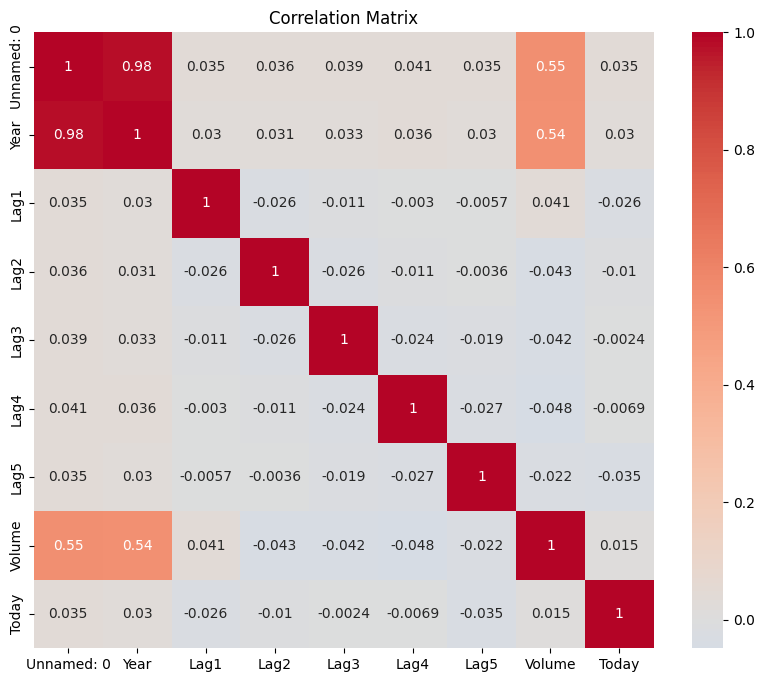

In [86]:
# drop direction column
smarket = smarket.drop(columns=['Direction'])

correlation_matrix = smarket.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

This correlation matrix shows the pairwise relationships between the features of the dataset. as we can see we have a some moderate positive correlation between _Volume_ and _year_ of 0.54. We can also see that the _Lag_ variables have very weak correlations which means that they are independent from each other, this could also mean that theese could be useful in helping us predict some other variable like _Direction_. 
 
We can now also plot the correlated predictors 'volume' and year.

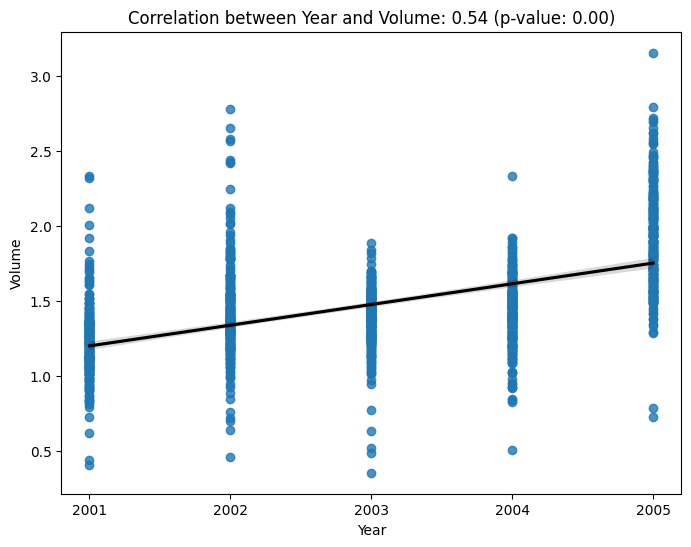

In [87]:
correlation_year_volume, p_value_year_volume = stats.pearsonr(smarket['Year'], smarket['Volume'])

plt.figure(figsize=(8, 6))
sns.regplot(x="Year", y="Volume", data=smarket, line_kws={'color':'black'})

# Ensure only whole numbers for years
plt.xticks(np.arange(smarket["Year"].min(), smarket["Year"].max() + 1, 1))

plt.title(f"Correlation between Year and Volume: {correlation_year_volume:.2f} (p-value: {p_value_year_volume:.2f})")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

This scatterplot, showing the correlated predictors _volume_ and _year_, show that there is a positive correlation between them. The positive slope indicates that trading volume (amount of trades) tends to increase over time from 2001 to 2005 and the P-value = 0 show us that this trend that this correlation is statistically significant. However, a correlation coefficient of 0.54 can indicate that other factors also contribute to fluctuations in trading volume.

### Perform logistic regressions

For this model, i want to use the _Direction_ feature as my response variable and i want to use all Lag1-Lag5 and volume as my predictors.

But of course, since Direction is categorical, python does not handle it very well so we have to convert it to dummy data. But luckily for us, there are only 2 classes in Direction, so we can just make the data binary instead. So for the 'Down' class, i will instead replace it by 0 and for the 'Up' class i will just make it 1.

In [88]:

smarket = pd.read_csv('Smarket.csv') # reload the data again since i dropped direction earlier

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0}) # convert to binary

log_reg_model = sm.Logit(smarket['Direction'], sm.add_constant(smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                0.002074
Time:                        17:49:14   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

From the coefficients we can see that Lag 1 has a negative coefficient. This suggests that if a given days returns was negative, then the probability of the next days market going up decreases but that is just by a tiny factor (-0.0731). However, as we can see from the P-value, this factor isn't statistically significant. Lag2 has a similar effect on the direction of the market. The _Volume_ coefficient is positive, which can imply that higher trading volumes slightly incrases the probability of the market going up, this is however not statistically significant either.

### Use the logistic regression models

Now i will use the log_reg_model to predict the probability that the market will go up, given the values of the predictors.

In [89]:
probs = log_reg_model.predict()

print(probs[0:10])

[0.50708413 0.48146788 0.48113883 0.51522236 0.51078116 0.50695646
 0.49265087 0.50922916 0.51761353 0.48883778]


Theese values given are the probability of the market going up and down. So as we can see, the first value is 0.507 which means that we can predict that the market will go up which matches the first row of the smarket.csv dataset.

I can now replicate the "contour" function from R in python to see the total amount of up and down predictions by  including a rule logic that sets that value to "up" in a different column if the probability is over 0.5.


In [90]:
smarket["Predicted_Directions"] = np.repeat("Down", smarket.shape[0])

smarket.loc[probs > 0.5, "Predicted_Directions"] = "Up"
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})


confusion_matrix = pd.crosstab(smarket["Predicted_Directions"], smarket["Direction"],  rownames=["Predicted"])
print(confusion_matrix)

# total accuracy
total_accuracy = (confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 1]) / smarket.shape[0]
print(f"Total accuracy: {total_accuracy:.2f}")

Direction  Down   Up
Predicted           
Down        145  141
Up          457  507
Total accuracy: 0.52


This confusion matrix, and confusion matrices in general in applications like this summarize how well the model predicts the response variable, which in this application is the Direction of the market. By looking at the identity components of the matrix (the diagonal), we can see that the model correctly predicted down when the actual direction was down 145 times and predicted up when the actual direction was going up which gives us a total of 652 correct predictions and 598 incorrect predictions which gives us a total accuracy of 0.52. 0.52 is not the best score, it is almost what one would get if someone were to just guess the direction. One interesting discovery however is that the model tends to predict up more than down which makes the model produce much more false positives compared to false negatives.



Now we can check if a smaller subset of predictors would yield a better result then what we got. For this, i will only include _Lag1_ and  _Lag2_ as my predictors for the next model.

In [91]:
smarket = pd.read_csv('Smarket.csv') # reload the data

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0}) # convert Direction to binary

log_reg_model_2 = sm.Logit(smarket['Direction'], sm.add_constant(smarket[['Lag1', 'Lag2']])).fit()


# The same code as above just changed the probs variable name.
probs_2 = log_reg_model_2.predict()

smarket["Predicted_Directions"] = np.repeat("Down", smarket.shape[0])

smarket.loc[probs_2 > 0.5, "Predicted_Directions"] = "Up"
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})


confusion_matrix = pd.crosstab(smarket["Predicted_Directions"], smarket["Direction"],  rownames=["Predicted"])
print(confusion_matrix)

# total accuracy
total_accuracy = (confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 1]) / smarket.shape[0]
print(f"Total accuracy: {total_accuracy:.2f}")


Optimization terminated successfully.
         Current function value: 0.691361
         Iterations 4
Direction  Down   Up
Predicted           
Down        114  102
Up          488  546
Total accuracy: 0.53


This model was not much better than the last model when it comes to accuracy as it only managed to get 1 point above the last model (0.53). However, this model is a good example of the importance of having good data. Here we used way less predictors then the last model but still got a slightly better result. So even if this model isnt that good either, it is much more efficient and there is less risk of overfitting. This also means that Lag1 and Lag2 are much more valuable predictors as their "predictive force" is already so great so the other added predictors only add noise on the training data. So for this model, less is actually more.

### Perform an LDA

Now i will perform an LDA on the smarket.csv dataset and analyze the result.


 prior probabilities of groups: 
 [0.4816 0.5184]

 group means: 
 [[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]

 coefficients of linear discriminants: 
 [[-0.07126095 -0.04433204]]


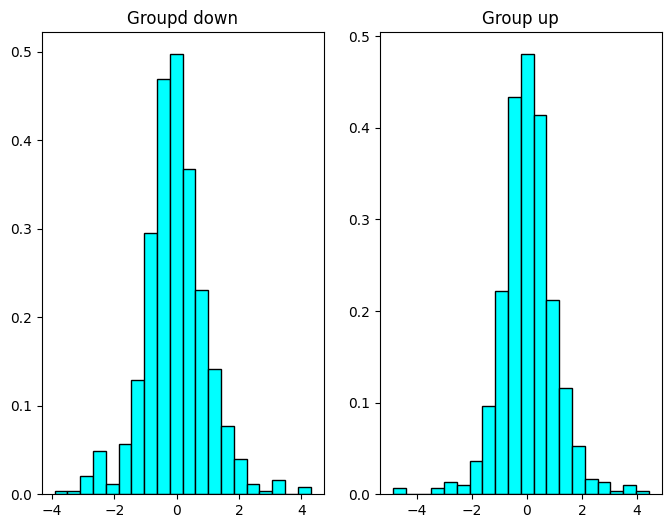

In [92]:
smarket = pd.read_csv('Smarket.csv') # reload the data

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0}) # convert Direction to binary

LDA_model = LDA().fit(smarket[['Lag1', 'Lag2']], smarket['Direction'])

print("\n prior probabilities of groups: \n", LDA_model.priors_)

print("\n group means: \n", LDA_model.means_)

print("\n coefficients of linear discriminants: \n", LDA_model.coef_)

# LDA scores
LDA_scores = LDA_model.transform(smarket[['Lag1', 'Lag2']])

# Plot the graphs
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.hist(LDA_scores[smarket['Direction'] == 0], bins=20, color='cyan', edgecolor='black', density=True)
plt.title("Groupd down")

plt.subplot(1, 2, 2)
plt.hist(LDA_scores[smarket['Direction'] == 1], bins=20, color='cyan', edgecolor='black', density=True)
plt.title("Group up")

plt.show()

The prior probabilities tell us about the frequency of "up" and "down" as outcomes in our data. So this means that there is a 48.16% chance of the direction being _down_ and 51.84% chance of the direction being _up_.

The group means suggest that on days when the market does go _down_, Lag1 and Lag2 were, on average, positive. but on the other hand, when market direction was _up_, Lag1 and Lag2 were slightly negative. This implies that negative "previous" returns are often associated with upward movement.

The linear discriminant coefficients represent of strongly each predictor influences classification and from that we can see that both Lag1 and Lag2 have small negative coefficients which as stated before indicate that higher previous day returns decrease the likelihood of market going up.

The graphs show us that the distributions are highly overlapping and almost centered around 0 which means that there is a limited separation between classes using Lag1 and lag2.


### Use the LDA model

In [93]:
# use the LDA model

# The same code as above just changed the probs variable name.
probs_3 = LDA_model.predict(smarket[['Lag1', 'Lag2']])

smarket["Predicted_Directions"] = np.repeat("Down", smarket.shape[0])

smarket.loc[probs_3 > 0.5, "Predicted_Directions"] = "Up"
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})


confusion_matrix = pd.crosstab(smarket["Predicted_Directions"], smarket["Direction"],  rownames=["Predicted"])
print(confusion_matrix)

# total accuracy
total_accuracy = (confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 1]) / smarket.shape[0]
print(f"Total accuracy: {total_accuracy:.2f}")


Direction  Down   Up
Predicted           
Down        114  102
Up          488  546
Total accuracy: 0.53


As we can see we got an identicall result from LDA as when i used the logistical model. This is because both LDA and Logistic regression have lienar decision boundaries. This coupled with the fact that we only have Lag1 and Lag2 as predictors causes both algorithms to produce the same output. The fact that we also have two possible outcomes from a given prediction (up and down), causes the predictors limited predictive force to be even more clear. An accuracy of 0.53 indicate that we should try to explore other models/algorithms instead like QDA or KNN.

### perform a QDA

Now i can also perform a QDA on the smarket data and analyze the result. For this i will just reuse the code that i created from the "perform a LDA" part, i will just change the arguments from LDA to QDA and change to appropriate variable names.

In [94]:
smarket = pd.read_csv('Smarket.csv') # reload the data

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0}) # convert Direction to binary

QDA_model = QDA().fit(smarket[['Lag1', 'Lag2']], smarket['Direction'])

print("\n prior probabilities of groups: \n", QDA_model.priors_)

print("\n group means: \n", QDA_model.means_)



 prior probabilities of groups: 
 [0.4816 0.5184]

 group means: 
 [[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]


This output is just the same as the one before when i defined the prior probabilites and means from the LDA model. This will logically be the same because this output is not a reflection of the efficiency or accuracy of the model, but rather, it gives some valuable insights for the data that we are dealing with for that model.

### Use the QDA model

In [95]:
# The same code as above just changed the probs variable name.
probs_4 = QDA_model.predict(smarket[['Lag1', 'Lag2']])

smarket["Predicted_Directions"] = np.repeat("Down", smarket.shape[0])

smarket.loc[probs_4 > 0.5, "Predicted_Directions"] = "Up"
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})

confusion_matrix = pd.crosstab(smarket["Predicted_Directions"], smarket["Direction"],  rownames=["Predicted"])
print(confusion_matrix)

# total accuracy
total_accuracy = (confusion_matrix.iloc[0, 0] + confusion_matrix.iloc[1, 1]) / smarket.shape[0]
print(f"Total accuracy: {total_accuracy:.2f}")

Direction  Down   Up
Predicted           
Down        109   94
Up          493  554
Total accuracy: 0.53


As we can see from the confusion matrix produced from the QDA, the accuracy is the same as it was for LDA. We can see that QDA has slightly less false positives and false negatives and is generally better at predicting when the market will go up while LDA is better att predicting downward movements. The accuracy is the same so if one had to chose between one of them, it would depend on what priorities one has. If someone prioritizes computational efficiency and slightly better predictions for downward movement, then LDA is perhaps the better model but for the latter, QDA is slightly better.

### Use the K-Nearest Neighbors Clustering

In this part of the assignment, i will implement and use KNN clustering as a model and provide interpretation of the results that i got.

First, i will reload the data. I will then create a filter that sets all years below 2005 to TRUE and all years over 2005 will be FALSE. I will then select all rows where the training set is FALSE (over 2005) and then print the dimensions of this data.

In [96]:
smarket = pd.read_csv('Smarket.csv')

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0})

train_set = smarket["Year"] < 2005
smarket_2005 = smarket[~train_set]

print(smarket_2005.shape)

(252, 10)


Now when this is done i have to create training and testing feature sets.

I will use the predictors _lag 1_ and _Lag 2_ like earlier but i will now split the training and testing data based on my filter that was defined above. So all of my training data will be when train is TRUE (before 2005) and all of my testing data will be for after 2005.

I will then also create the corresponding labels for the response variable which is 'Direction' like before.

I can also print the dimensions of all of theese sets as well.

In [97]:
train_X = smarket.loc[train_set, ['Lag1', 'Lag2']].values
test_X = smarket.loc[~train_set, ['Lag1', 'Lag2']].values

# Define training and test labels (Direction)
train_y = smarket.loc[train_set, "Direction"].values
test_y = smarket.loc[~train_set, "Direction"].values

print("Train X shape:", train_X.shape)
print("Test X shape:", test_X.shape)
print("Train y shape:", train_y.shape)
print("Test y shape:", test_y.shape)

Train X shape: (998, 2)
Test X shape: (252, 2)
Train y shape: (998,)
Test y shape: (252,)


I can now use this to create a KNN model for N= 1 and N=3.

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_X, train_y)

# Predict on test data
knn_pred = knn_model.predict(test_X)

# Get test set indices
test_idx = smarket.index[~train_set]

# Debugging step: Ensure test_idx contains valid indices
print("Test indices:", test_idx.tolist()[:10])  # Print first 10 test indices

# Assign "Up" or "Down" using np.where
smarket.loc[test_idx, "Predicted_Directions"] = np.where(knn_pred == 1, "Up", "Down")

# Debugging step: Check assigned predictions
print(smarket.loc[test_idx, ["Predicted_Directions", "Direction"]].head(10))

# Ensure 'Direction' column is correctly mapped
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})

# Compute confusion matrix using only test set rows
conf_matrix = pd.crosstab(
    smarket.loc[test_idx, "Predicted_Directions"],
    smarket.loc[test_idx, "Direction"],
    rownames=["Predicted"], colnames=["Actual"]
)

# Print confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(smarket.loc[test_idx, "Direction"], smarket.loc[test_idx, "Predicted_Directions"])
print(f"\nAccuracy: {accuracy:.2f}")


Test indices: [998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007]
     Predicted_Directions  Direction
998                    Up          0
999                  Down          0
1000                   Up          0
1001                   Up          1
1002                   Up          0
1003                 Down          1
1004                 Down          0
1005                 Down          1
1006                 Down          0
1007                   Up          1

Confusion Matrix:
 Actual     Down  Up
Predicted          
Down         43  58
Up           68  83

Accuracy: 0.50


In [99]:
smarket = pd.read_csv('Smarket.csv')

smarket["Direction"] = smarket["Direction"].map({'Up': 1, 'Down': 0})

train_set = smarket["Year"] < 2005
smarket_2005 = smarket[~train_set]

print(smarket_2005.shape)

train_X = smarket.loc[train_set, ['Lag1', 'Lag2']].values
test_X = smarket.loc[~train_set, ['Lag1', 'Lag2']].values

# Define training and test labels (Direction)
train_y = smarket.loc[train_set, "Direction"].values
test_y = smarket.loc[~train_set, "Direction"].values

print("Train X shape:", train_X.shape)
print("Test X shape:", test_X.shape)
print("Train y shape:", train_y.shape)
print("Test y shape:", test_y.shape)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)

# Predict on test data
knn_pred = knn_model.predict(test_X)

# Get test set indices
test_idx = smarket.index[~train_set]

# Debugging step: Ensure test_idx contains valid indices
print("Test indices:", test_idx.tolist()[:10])  # Print first 10 test indices

# Assign "Up" or "Down" using np.where
smarket.loc[test_idx, "Predicted_Directions"] = np.where(knn_pred == 1, "Up", "Down")

# Debugging step: Check assigned predictions
print(smarket.loc[test_idx, ["Predicted_Directions", "Direction"]].head(10))

# Ensure 'Direction' column is correctly mapped
smarket["Direction"] = smarket["Direction"].map({1: "Up", 0: "Down"})

# Compute confusion matrix using only test set rows
conf_matrix = pd.crosstab(
    smarket.loc[test_idx, "Predicted_Directions"],
    smarket.loc[test_idx, "Direction"],
    rownames=["Predicted"], colnames=["Actual"]
)

# Print confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(smarket.loc[test_idx, "Direction"], smarket.loc[test_idx, "Predicted_Directions"])
print(f"\nAccuracy: {accuracy:.2f}")


(252, 10)
Train X shape: (998, 2)
Test X shape: (252, 2)
Train y shape: (998,)
Test y shape: (252,)
Test indices: [998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007]
     Predicted_Directions  Direction
998                  Down          0
999                  Down          0
1000                 Down          0
1001                   Up          1
1002                   Up          0
1003                 Down          1
1004                   Up          0
1005                 Down          1
1006                   Up          0
1007                   Up          1

Confusion Matrix:
 Actual     Down  Up
Predicted          
Down         48  55
Up           63  86

Accuracy: 0.53


So as we can see when comapring K=1 and K=3, the higher K model improves accuracy from 50% to 53%. We can also see that the confusion matrix is improved for the K=3 model which means that a larger K makes predictions less sensitive to noise or outliers in the training set. K=3 model also gives a more balanced result which means that it makes more stable predictions between the directions up and down and isnt much better at one prediction then the other as compared to the K=1 model. this can be seen from a more balanced confusion matrix. this meaans that the K=3 model is preferable because of the improved accuracy and balance. 

As we can see, none of the models that were experimented with here really performed that well. This is because predicting stock market movements requires extreme amounts of data, even when trying to compute a binary "up" and "down" movement, not even caring about the specific returns. We would need way more data and way more information that isn't specifically tied to numerical information that can be printed on a graph. We would need domain information about industry events, global events and we would also need more information about market sentiment, market efficiency, macroeconomic conditions, market cycles and a lot of other data that is quite frankly sometimes even hard to measure.